<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/Oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Use stock indicators with machine learning to try to predict the direction of a stock price: 
#1 means the stock price goes up 
#0 means the stock price goes down or stays the same

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pdr.get_data_fred('DCOILBRENTEU',start='2020-01-01', end='2021-03-19')
df.columns = ['Close']
df

,Close
DATE,
2020-01-01,NaN
2020-01-02,67.05
2020-01-03,69.08
2020-01-06,70.25
2020-01-07,68.74
...,...
2021-03-15,68.78
2021-03-16,67.95
2021-03-17,67.73


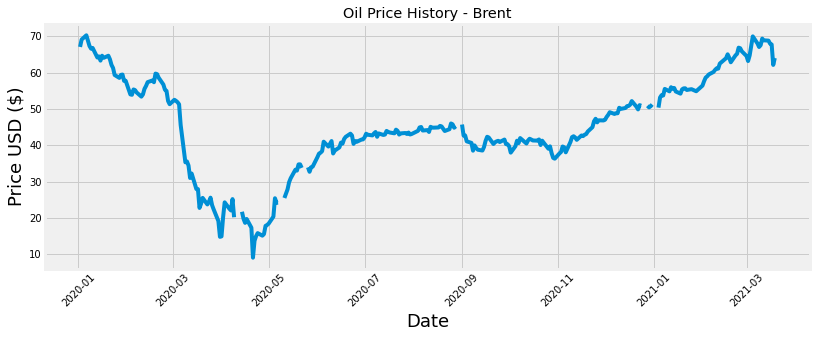

In [3]:
# Visually Show The Stock Price(s)
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title('Oil Price History - Brent')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [4]:
# Calculate the three moving averages
#Calculate ther Short / Fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the Middle / Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the Long / Slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust=False).mean()

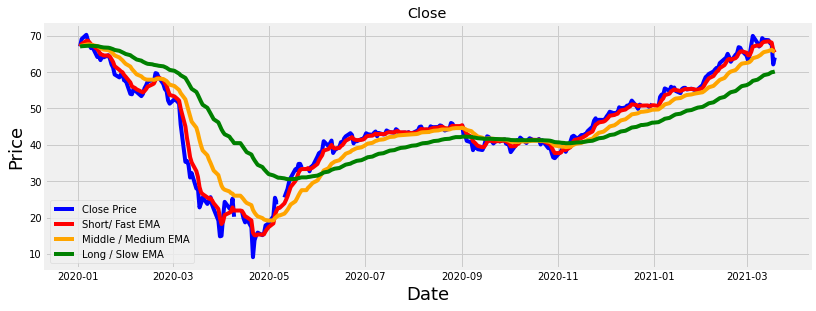

In [5]:
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Close')
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange')
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green')
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [6]:
# Add the EMV to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,Close,Short,Middle,Long
DATE,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,67.05,67.050000,67.050000,67.050000
2020-01-03,69.08,67.726667,67.234545,67.113437
2020-01-06,70.25,68.567778,67.508678,67.211455
2020-01-07,68.74,68.625185,67.620616,67.259222
...,...,...,...,...
2021-03-15,68.78,68.454315,65.786334,59.448339
2021-03-16,67.95,68.286210,65.983031,59.714015
2021-03-17,67.73,68.100807,66.141847,59.964515


In [7]:
#Create the function to buy and sell the stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

In [8]:
#Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

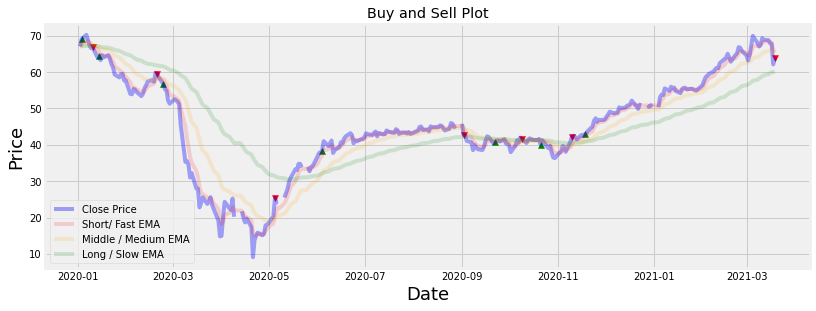

In [9]:
#Visually show the stock buy 
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Buy and Sell Plot')
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red', alpha = 0.15)
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange', alpha = 0.15)
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green', alpha = 0.15)
plt.scatter(df.index, df['Buy'], color='green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', marker = 'v', alpha = 1)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()